# Step 1: Connect to SQLite Database

In [9]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

conn = sqlite3.connect("DataScience_Salaries.db")

In [10]:
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('DataScience_Salaries',)]


In [11]:
# A function to display any table by putting its name into the function
def view_table(name):
    df = pd.read_sql_query(f"SELECT * FROM {name} LIMIT 5", conn) 
    display(df)
    
view_table("DataScience_Salaries")

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2025.0,Data Scientist,Data Science,USD,152000,152000,United States,Entry,Full-time,Remote,"San Francisco, CA",Large
1,2025.0,Machine Learning Engineer,Machine Learning,USD,175000,175000,United States,Mid,Full-time,Hybrid,"New York, NY",Large
2,2025.0,Senior Data Scientist,Data Science,USD,195000,195000,United States,Senior,Full-time,In-person,"Seattle, WA",Large
3,2025.0,Data Analyst,Data Analysis,USD,86500,86500,United States,Entry,Full-time,Remote,"Austin, TX",Medium
4,2025.0,Principal Data Scientist,Data Science,USD,243000,243000,United States,Senior,Full-time,Hybrid,"San Francisco, CA",Large


# Step 2: Practicing Writing Queries

In [12]:
# Defining a function to use to easily run SQL queries
def run_query(sql_query, conn):
    df = pd.read_sql_query(sql_query, conn)
    display(df)
    return df

In [13]:
# Display the first 10 rows of Jobs with their respective Salaries in USD
query1 = """ 
SELECT job_title AS 'Job', salary_in_usd AS 'Salary (USD)'
FROM DataScience_Salaries
LIMIT 10; 
"""
df = run_query(query1, conn)

,Job,Salary (USD)
0,Data Scientist,152000
1,Machine Learning Engineer,175000
2,Senior Data Scientist,195000
3,Data Analyst,86500
4,Principal Data Scientist,243000
5,AI Engineer,190000
6,Data Engineer,125000
7,Business Intelligence Analyst,78000
8,Quantitative Analyst,165000
9,Data Architect,190000


In [31]:
# Display all job categories grouped by their average salaries
def get_avg_salary_by_category(conn):
    query2 = """
    SELECT job_category, AVG(salary_in_usd) AS avg_salary
    FROM DataScience_Salaries
    GROUP BY job_category
    ORDER BY avg_salary DESC;
    """
    return run_query(query2, conn)

df = get_avg_salary_by_category(conn)

,job_category,avg_salary
0,Nothingness Computing,755000.000000
1,Divine Void Computing,745000.000000
2,Timeless Computing,735000.000000
3,Data Science,728943.884892
4,Surrender Computing,725000.000000
...,...,...
456,Data Linguistics,67800.000000
457,Education,64900.000000
458,Data Sociology,64900.000000
459,Data Mining,62700.000000


In [15]:
# Display the top 5 highest paying job titles (salary_in_usd)
query3 = """
SELECT job_title, salary_in_usd
FROM DataScience_Salaries
ORDER BY salary_in_usd DESC
LIMIT 5;
"""

df = run_query(query3, conn)

,job_title,salary_in_usd
0,Data Scientist,40000000
1,Senior Data Scientist,21500000
2,Machine Learning Engineer,6000000
3,Machine Learning Engineer,4985000
4,Machine Learning Engineer,4950000


In [23]:
# Find all full-time jobs paying over $200,000

query4 = """
SELECT job_title, salary_in_usd
FROM DataScience_Salaries
WHERE salary_in_usd > 200000 AND employment_type = 'Full-time';
"""

df = run_query(query4, conn)

,job_title,salary_in_usd
0,Principal Data Scientist,243000
1,AI Specialist,205000
2,Chief Data Officer,285000
3,Data Engineering Manager,220000
4,Senior AI Engineer,225000
...,...,...
432,Cosmic Divine Release Algorithm Engineer,685000
433,Divine Perfect Surrender Data Specialist,725000
434,Infinite Divine Dissolution Computing Engineer,715000
435,Universal Divine Merge Data Researcher,705000


In [34]:
# Find average salary by experience level

query5 = """
SELECT experience_level, AVG(salary_in_usd) AS avg_salary
FROM DataScience_Salaries
GROUP BY experience_level;
"""

df5 = run_query(query5, conn)

,experience_level,avg_salary
0,Entry,438085.380117
1,Mid,234828.350515
2,Senior,450590.496760


In [29]:
# Find the 5 job titles that appear the most often.

query6 = """
SELECT job_title, COUNT(*) AS job_count
FROM DataScience_Salaries
GROUP BY job_title
ORDER BY COUNT(*) DESC
LIMIT 5;
"""

df_top = run_query(query6, conn)

,job_title,job_count
0,Machine Learning Engineer,88
1,Data Scientist,78
2,Junior Data Scientist,26
3,Senior Data Scientist,20
4,Junior Data Engineer,16


# Step 3: Visualize Data

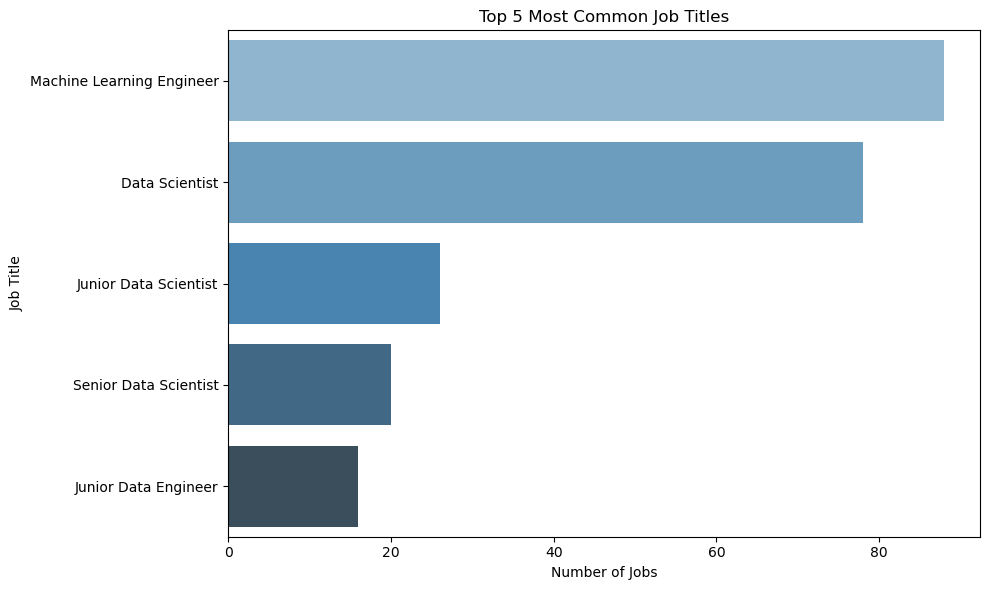

In [30]:
# Barplot of top 5 most common job titles (using your SQL result from query6)

plt.figure(figsize=(10, 6))
sns.barplot(x='job_count', y='job_title', data=df_top, palette='Blues_d')
plt.title('Top 5 Most Common Job Titles')
plt.xlabel('Number of Jobs')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

**Summary:** The most common job title is Machine Learning Engineer with 88 listings, followed by Data Scientist with 78. Junior and Senior Data Scientist roles appear less often, which might mean many listings don’t specify experience level clearly. Junior Data Engineer jobs are fewer but still present. This shows ML Engineers and Data Scientists are in high demand.

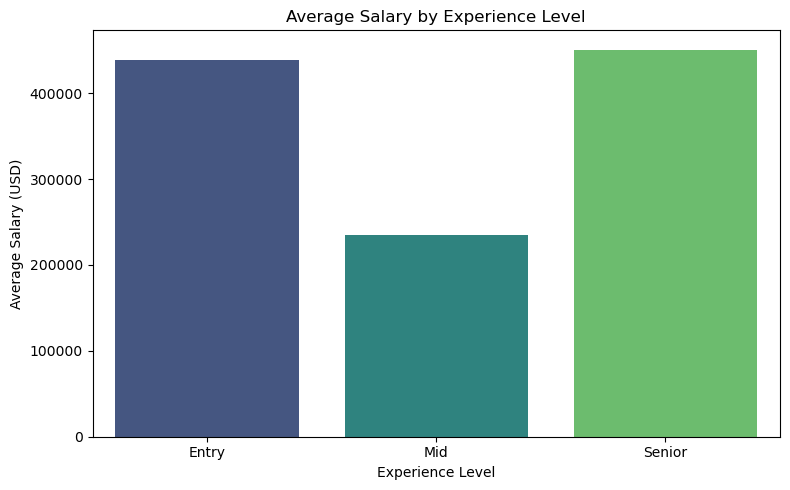

In [35]:
# Plot for Average Salary by Experience Level

plt.figure(figsize=(8,5))
sns.barplot(x='experience_level', y='avg_salary', data=df5, palette='viridis')
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.tight_layout()
plt.show()

**Summary:** This is interesting because normally you’d expect salaries to increase steadily with experience level. Here, the mid-level average is much lower than entry and senior levels, which could indicate:

* A smaller or different sample size for mid-level jobs,

* Some outliers or high salaries skewing the averages for entry and senior levels,

* Or possibly data irregularities in how experience levels were reported.

**Next Steps:** This unusual salary pattern suggests further research is needed to understand the distribution and possible outliers because the average salary for mid-level positions is unexpectedly lower than for entry and senior levels. Therefore, I chose to analyze the data by examining the number of jobs per experience level and visualizing salary distributions using boxplots to get a clearer picture of the data spread, detect any anomalies, and better understand the salary trends across experience levels.

In [44]:
query7 = """
SELECT experience_level, salary_in_usd
FROM DataScience_Salaries
LIMIT 500;
"""

df_salaries = run_query(query7, conn)

,experience_level,salary_in_usd
0,Entry,152000
1,Mid,175000
2,Senior,195000
3,Entry,86500
4,Senior,243000
...,...,...
495,Senior,355000
496,Senior,325000
497,Mid,185000
498,Senior,345000


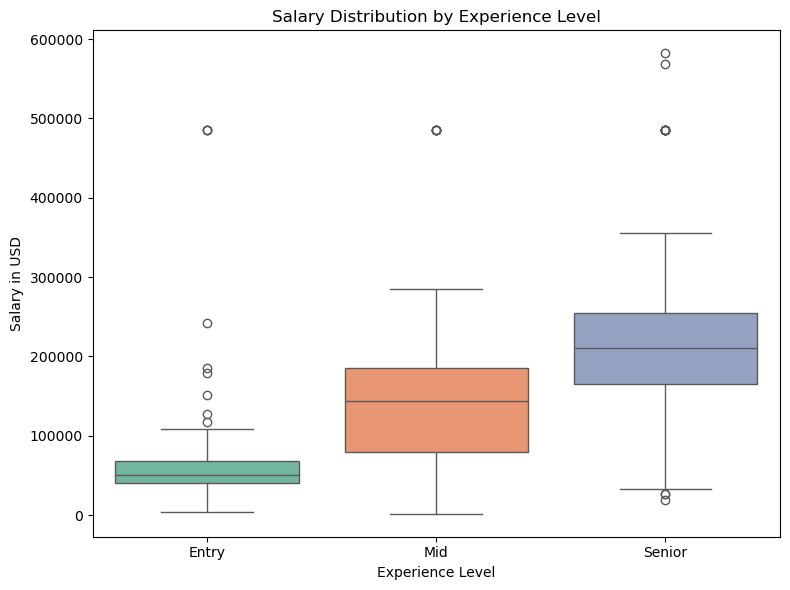

In [45]:
plt.figure(figsize=(8,6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df_salaries, palette='Set2')
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.tight_layout()
plt.show()

**Summary:** The salary distribution plot reveals a wide range of salaries within each experience level, with the entry-level group showing the most variation and several outliers. This suggests that entry-level positions have diverse compensation packages, likely influenced by factors such as company type, location, and job responsibilities.